# TP ISI

### Importo Bibliotecas

In [1344]:
import pandas as pd
import numpy as np

### Lectura de datos

In [1345]:
df = pd.read_csv('data/survey_results_public.csv')

### Columnas

In [1346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

### Cantidad de datos en jos sat

In [1347]:
df['JobSat'].value_counts()

Very satisfied                        14611
Slightly satisfied                    13930
Slightly dissatisfied                  7124
Neither satisfied nor dissatisfied     5783
Very dissatisfied                      3746
Name: JobSat, dtype: int64

### Respondent

In [1348]:
# Es el numero de encuestado, se elimina
df.drop(['Respondent'], axis=1, inplace=True)

### MainBranch

In [1349]:
df['MainBranch'].value_counts()

I am a developer by profession                                                   47193
I am a student who is learning to code                                            7970
I am not primarily a developer, but I write code sometimes as part of my work     5502
I code primarily as a hobby                                                       2314
I used to be a developer by profession, but no longer am                          1183
Name: MainBranch, dtype: int64

In [1350]:
# Nos quedamos como aquellos que son desarrolladores por profesion o, si bien no son desarrolladores, 
# escriben codigo como parte de su trabajo. Se descarta el resto ya que no aportan a la incestigación
# Luego se elimina la columna
values= ['I am a developer by profession', 'I am not primarily a developer, but I write code sometimes as part of my work']
df = df[df.MainBranch.isin(values)]
df['MainBranch'].value_counts()

I am a developer by profession                                                   47193
I am not primarily a developer, but I write code sometimes as part of my work     5502
Name: MainBranch, dtype: int64

In [1351]:
# Modificamos la columna para que sea más entendible
df.MainBranch = df.MainBranch.apply(lambda x: 'Developer' if x == 'I am a developer by profession' else 'Not developer')

### Hobbyist 

In [1352]:
### Describe si ademas de hacerlo de manera laboral, la persona programa como un hobby.
### Nos da una media del interes y el gusto de la persona en la programación. Valores Yes y No, se considera correcta

In [1353]:
df.Hobbyist.value_counts()

Yes    40433
No     12224
Name: Hobbyist, dtype: int64

### Age

In [1354]:
# Se consideran nulas todas aquellas edades menores a 16 años y mayores a 90 años
df.Age = df.Age.apply(lambda x: None if (x<16 or x>90) else x)

In [1355]:
def classify_age(x):
    if (x>=16 and x < 25):
        return 'Entre 16 y 25'
    if (x >= 25 and x < 35):
        return 'Entre 25 y 35'
    if (x >= 35 and x < 45):
        return 'Entre 35 y 45'
    if (x >= 45 and x < 55):
        return 'Entre 45 y 55'
    if (x >=55 and x < 65):
        return 'Entre 55 y 65'
    if (x >=65 and x < 75):
        return 'Entre 65 y 75'
    if (x >=75 and x < 85):
        return 'Entre 75 y 85'
    return None
    
# Vamos a dividir a las personas en tres grupos: 
df.Age = df.Age.apply(lambda x: classify_age(x))    


### Age1stCode

In [1356]:
# Edad en la que la persona escribió sus primeras lineas de código
# Esta columna nos sirve para ver si la persona aprendió a programar a una edad adulta o de pequeño
# Vamos a clasificarla en algunos grupos:

In [1357]:
df.Age1stCode=df.Age1stCode.replace('Older than 85', 65)
df.Age1stCode=df.Age1stCode.replace('Younger than 5 years', 5)
df.Age1stCode=df.Age1stCode.fillna(90)


In [1358]:
def classify_Age1stCode(x):
    if (x>=4 and x < 12):
        return 'Antes de los 12'
    if (x >= 12 and x < 18):
        return 'Entre los 12 y los 18'
    if (x >= 18 and x < 25):
        return 'Entre los 18 y los 25'
    if (x >= 25 and x < 35):
        return 'Entre los 25 y los 35'
    if (x >= 35 and x < 45):
        return 'Entre los 35 y los 45'
    if (x >= 45 and x < 60):
        return 'Entre los 45 y los 60'
    if (x >= 60 and x <= 85):
        return 'Despues de los 60'
    return None

# Vamos a dividir a las personas en tres grupos: 
df.Age1stCode = df.Age1stCode.apply(lambda x: classify_Age1stCode(int(x))) 

In [1359]:
df.Age1stCode.value_counts()

Entre los 12 y los 18    24914
Entre los 18 y los 25    12139
Antes de los 12           8881
Entre los 25 y los 35     1751
Entre los 35 y los 45      181
Entre los 45 y los 60       41
Despues de los 60           14
Name: Age1stCode, dtype: int64

### CompFreq

In [1360]:
# Frecuencia con la que se recibe la compensación, el campo está correcto

In [1361]:
df.CompFreq.value_counts()

Yearly     19818
Monthly    18899
Weekly      1352
Name: CompFreq, dtype: int64

### CompTotal

In [1362]:
# Es el salario pero expresado en moneda local por lo que se descarta ya que se utilizará el salario en dolares
df.drop(['CompTotal'], axis=1, inplace=True)

###  ConvertedComp 

In [1363]:
# Es el salario en dolares, esta columa nos interesa pero tambien vamos a discretizarla

In [1364]:
def classify_ConvertedComp(x):
    if (x == 0):
        return 'Gratis'
    if (x > 100 and x < 1000):
        return 'Menos de 1000'
    if (x > 1000 and x < 3000):
        return 'Entre 1.000 y los 3.000'
    if (x > 3000 and x < 5000):
        return 'Entre 3.000 y los 5.000'
    if (x > 5000 and x < 10000):
        return 'Entre 5.000 y los 10.000'
    if (x > 10000 and x < 20000):
        return 'Entre 10.000 y los 20.000'
    if (x > 20000 and x < 40000):
        return 'Entre 20.000 y los 40.000'
    if (x > 40000 and x < 60000):
        return 'Entre 40.000 y los 60.000'
    if (x > 60000 and x < 80000):
        return 'Entre 60.000 y los 80.000'
    if (x >= 80000 and x < 100000):
        return 'Entre 80.000 y los 100.000'
    if (x >= 100000 and x < 250000):
        return 'Entre 100.000 y los 250.000'
    if (x >= 250000 and x < 500000):
        return 'Entre 250.000 y los 500.000'
    if (x >= 500000 and x < 1000000):
        return 'Entre 500.000 y los 1.000.000'
    if (x >= 1000000):
        return 'Más de 1.000.000'
    return None

df.ConvertedComp = df.ConvertedComp.apply(lambda x: classify_ConvertedComp(x))

In [1365]:
df.ConvertedComp.value_counts()

Entre 100.000 y los 250.000      6300
Entre 20.000 y los 40.000        5957
Entre 40.000 y los 60.000        5713
Entre 60.000 y los 80.000        4342
Entre 10.000 y los 20.000        3506
Entre 80.000 y los 100.000       2980
Entre 5.000 y los 10.000         2143
Entre 3.000 y los 5.000           799
Entre 250.000 y los 500.000       675
Más de 1.000.000                  656
Entre 500.000 y los 1.000.000     584
Entre 1.000 y los 3.000           509
Gratis                            142
Menos de 1000                     139
Name: ConvertedComp, dtype: int64

### Country

In [1366]:
# Convert it to continent

In [1367]:
aux = df.Country.dropna()

In [1368]:
def get_continent(x):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(x)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name
    except:
        return None
        

In [1369]:
aux  = aux.apply(lambda x: get_continent(x))

In [1370]:
df.Country = aux
df.rename(columns = {'Country':'Continent'},inplace=True)

In [1371]:
df['Continent'].value_counts()

Series([], Name: Continent, dtype: int64)

### CurrencyDesc /  CurrencySymbol

In [1372]:
# Muchos valores, el salario se analizará en dolares y no aremos un analisis por país sino que a nivel continental
# por lo que la columna se descarta.

In [1373]:
df['CurrencyDesc'].value_counts()

United States dollar     11050
European Euro            10000
Indian rupee              4930
Pound sterling            3127
Canadian dollar           1570
                         ...  
Cayman Islands dollar        1
Lesotho loti                 1
e\tFaroese krona             1
Somali shilling              1
Namibian dollar              1
Name: CurrencyDesc, Length: 142, dtype: int64

###  DatabaseDesireNextYear

### DatabaseWorkedWith

### DevType

In [1374]:
# Profesiones
devtypes = ['Academic researcher',
'Data or business analyst',
'Data scientist or machine learning specialist',
'Database administrator',
'Designer',
'Developer, back-end',
'Developer, desktop or enterprise applications',
'Developer, embedded applications or devices',
'Developer, front-end',
'Developer, full-stack',
'Developer, game or graphics',
'Developer, mobile',
'Developer, QA or test',
'DevOps specialist',
'Educator',
'Engineer, data',
'Engineer, site reliability',
'Engineering manager',
'Marketing or sales professional',
'Product manager',
'Scientist',
'Senior Executive (C-Suite, VP, etc.)',
'System administrator']

In [1375]:
#Inicializo las columnas en None
for column in devtypes:
    df[column] = None

In [1376]:
#Reemplazo valores nulos en DevType por ""
df['DevType']=df['DevType'].fillna("")

In [1377]:
# Para cada profesion me fijo si la persona se dedida o no a ella
for column in devtypes:
    df[column] = df['DevType'].apply(lambda x: column in x )

In [1378]:
# Vemos como quedaron las columnas
for column in devtypes:
    print(df[column].value_counts())

False    49546
True      3149
Name: Academic researcher, dtype: int64
False    49057
True      3638
Name: Data or business analyst, dtype: int64
False    49043
True      3652
Name: Data scientist or machine learning specialist, dtype: int64
False    47353
True      5342
Name: Database administrator, dtype: int64
False    47989
True      4706
Name: Designer, dtype: int64
False    26816
True     25879
Name: Developer, back-end, dtype: int64
False    41530
True     11165
Name: Developer, desktop or enterprise applications, dtype: int64
False    48229
True      4466
Name: Developer, embedded applications or devices, dtype: int64
False    35541
True     17154
Name: Developer, front-end, dtype: int64
False    26868
True     25827
Name: Developer, full-stack, dtype: int64
False    50246
True      2449
Name: Developer, game or graphics, dtype: int64
False    43867
True      8828
Name: Developer, mobile, dtype: int64
False    48987
True      3708
Name: Developer, QA or test, dtype: int64
False 

In [1379]:
# Elimino Jobfactors
df = df.drop('DevType', axis=1)

### EdLevel

In [1380]:
# Solo se emprolijan los valores

In [1381]:
df['EdLevel'].value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          23539
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       12194
Some college/university study without earning a degree                                 5484
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     2161
Other doctoral degree (Ph.D., Ed.D., etc.)                                             1563
Associate degree (A.A., A.S., etc.)                                                    1529
Professional degree (JD, MD, etc.)                                                      692
I never completed any formal education                                                  325
Primary/elementary school                                                               257
Name: EdLevel, dtype: int64

In [1382]:
def  reformat_edlevel(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor'
    if 'Master’s degree' in x:
        return 'Master'
    if 'Some college/university study without earning a degree' in x:
        return 'Incomplete university'
    if 'Secondary school' in x:
        return 'Secondary'
    if 'Associate degree' in x:
        return 'Associate'
    if 'Other doctoral degree (Ph.D., Ed.D., etc.)'in x:
        return 'Doctorate'
    if 'Professional degree (JD, MD, etc.)' in x:
        return 'Professional'
    if 'Primary/elementary school' in x:
        return 'Primary'
    if 'I never completed any formal education' in x:
        return 'Without studies'
    return None

df['EdLevel']=df['EdLevel'].fillna("")
df['EdLevel'] = df['EdLevel'].apply(lambda x: reformat_edlevel(x))

In [1383]:
df['EdLevel'].value_counts()

Bachelor                 23539
Master                   12194
Incomplete university     5484
Secondary                 2161
Doctorate                 1563
Associate                 1529
Professional               692
Without studies            325
Primary                    257
Name: EdLevel, dtype: int64

###  Employment

In [1384]:
df['Employment'].value_counts()

Employed full-time                                      43348
Independent contractor, freelancer, or self-employed     5001
Employed part-time                                       1634
Student                                                  1118
Not employed, but looking for work                       1108
Not employed, and not looking for work                     94
Retired                                                    67
Name: Employment, dtype: int64

In [1385]:
# Para el analisis solo nos interesan los aquellos que estan empleados full time o part time, 
# el resto no aporta a la investigación
df = df[df.Employment.isin(['Employed full-time', 'Employed part-time'])]
df.Employment.value_counts()

Employed full-time    43348
Employed part-time     1634
Name: Employment, dtype: int64

In [1386]:
# Dado que la cantidad de empleados part time no es significativa, se elimina la columna
df = df.drop('Employment', axis=1)

### Ethnicity

In [1387]:
df.value_counts()

Series([], dtype: int64)

In [1388]:
def get_ethnicity(x):
    if 'Indigenous' in x:
        return 'Indigenous'
    if 'Biracial' in x or 'Multiracial' in x:
        return 'Birracial/Multiracial'
    if 'Black or of African descent' in x:
        return 'Black or of African descent'
    if 'Hispanic or Latino/a/x' in x:
        return 'Latino'
    if 'Asian' in x or 'Middle Eastern' in x:
        return 'Asian'
    if 'White or of European descent' in x:
        return 'White or of European descent'  
    return None 

In [1389]:
df.Ethnicity = df.Ethnicity.fillna("")
df.Ethnicity = df['Ethnicity'].apply(lambda x: get_ethnicity(x))
df.Ethnicity.value_counts()    

White or of European descent    21798
Asian                            6857
Latino                           2256
Black or of African descent       827
Birracial/Multiracial             763
Indigenous                        254
Name: Ethnicity, dtype: int64

### Gender

In [1390]:
df['Gender'].value_counts()

Man                                                            32570
Woman                                                           2739
Non-binary, genderqueer, or gender non-conforming                255
Man;Non-binary, genderqueer, or gender non-conforming             78
Woman;Non-binary, genderqueer, or gender non-conforming           53
Woman;Man                                                         35
Woman;Man;Non-binary, genderqueer, or gender non-conforming       15
Name: Gender, dtype: int64

In [1391]:
def get_gender(x):
    if 'Non-binary' in x or 'Woman;Man' in x:
        return 'Non-binary'
    if 'Woman' in x:
        return 'woman'
    if 'Man' in x:
        return 'Man'
    return None

In [1392]:
df.Gender = df.Gender.fillna("")
df.Gender = df.Gender.apply(lambda x: get_gender(x))

In [1393]:
df.Gender.value_counts()

Man           32570
woman          2739
Non-binary      436
Name: Gender, dtype: int64

### JobFactors

In [1394]:
JobFactors_list = [
    'Remote work',
    'company culture',
    'Financial performance',
    'Opportunities',
    'Diversity',
    'impactful',
    'Industry',
    'Specific department',
    'Flex time',
    'technologies',
    'Family friendliness',
]

In [1395]:
#Inicializo las columnas en None
for column in JobFactors_list:
    df[column] = None

In [1396]:
#Reemplazo valores nulos en JobFactor por ""
df['JobFactors']=df['JobFactors'].fillna("")

In [1397]:
# Para cada factor me fijo si la persona lo marcó
for column in JobFactors_list:
    df[column] = df['JobFactors'].apply(lambda x: column in x )

In [1398]:
# Vemos como quedaron las columnas
for column in JobFactors_list:
    print(df[column].value_counts())

False    33016
True     11966
Name: Remote work, dtype: int64
False    27762
True     17220
Name: company culture, dtype: int64
False    40534
True      4448
Name: Financial performance, dtype: int64
False    29720
True     15262
Name: Opportunities, dtype: int64
False    42521
True      2461
Name: Diversity, dtype: int64
False    37482
True      7500
Name: impactful, dtype: int64
False    39702
True      5280
Name: Industry, dtype: int64
False    40678
True      4304
Name: Specific department, dtype: int64
False    28448
True     16534
Name: Flex time, dtype: int64
False    25791
True     19191
Name: technologies, dtype: int64
False    40438
True      4544
Name: Family friendliness, dtype: int64


In [1399]:
# Elimino Jobfactors
df = df.drop('JobFactors', axis=1)

### JobSat

In [1400]:
df['JobSat'].value_counts()

Very satisfied                        12953
Slightly satisfied                    12664
Slightly dissatisfied                  6514
Neither satisfied nor dissatisfied     5070
Very dissatisfied                      3306
Name: JobSat, dtype: int64

In [1401]:
# Es la columna que queremos predecir por lo que se eliminan todos los registros que no tienen datos en esta columna
df = df.dropna(subset = ["JobSat"])

In [1402]:
# Se agrupa satisfecho, ni satisfecho ni insatisfecho y desatisfecho
def get_JobSat(x):
    if x in ['Very satisfied', 'Slightly satisfied']:
        return 'Satisfied'
    if x in ['Very dissatisfied', 'Slightly dissatisfied']:
        return 'Dissatisfied'
    return "Neither"

df['JobSat'] = df['JobSat'].apply(lambda x: get_JobSat(x))

In [1403]:
df['JobSat'].value_counts()

Satisfied       25617
Dissatisfied     9820
Neither          5070
Name: JobSat, dtype: int64

### JobSeek

In [1404]:
df.JobSeek.value_counts()

I’m not actively looking, but I am open to new opportunities    22754
I am not interested in new job opportunities                    10539
I am actively looking for a job                                  5009
Name: JobSeek, dtype: int64

In [1405]:
#Reemplazo valores nulos en JobSeek por ""
df['JobSeek'] = df['JobSeek'].fillna("")

In [1406]:
def get_jobseek(x):
    if 'I’m not actively looking, but I am open to new opportunities' in x:
        return 'Open to opportunities'
    if 'I am not interested in new job opportunities' in x:
        return 'Not interested'
    if 'I am actively looking for a job' in x:
        return 'Looking for'
    return None

In [1407]:
df.JobSeek = df.JobSeek.apply(lambda x: get_jobseek(x))

In [1408]:
df.JobSeek.value_counts()

Open to opportunities    22754
Not interested           10539
Looking for               5009
Name: JobSeek, dtype: int64

### LanguageDesireNextYear

In [1409]:
# Se elimina, no la podemos usar

In [1410]:
df['LanguageDesireNextYear'].value_counts()

Python                                                  689
HTML/CSS;JavaScript;TypeScript                          384
Rust                                                    362
C#;HTML/CSS;JavaScript;SQL;TypeScript                   327
C#                                                      326
                                                       ... 
Bash/Shell/PowerShell;Dart;Go;Java;Python;R;Rust;SQL      1
C#;C++;HTML/CSS;Java;JavaScript;Kotlin;Python;Rust        1
HTML/CSS;JavaScript;R;Ruby;SQL                            1
Assembly;C;C++;Go;Kotlin;Python;Rust                      1
C#;Python;Ruby;TypeScript                                 1
Name: LanguageDesireNextYear, Length: 11265, dtype: int64

In [1411]:
df.drop('LanguageDesireNextYear', axis=1, inplace=True)

### NEWDevOps NEWDevOpsImpt 

In [1412]:
# Dejarlo en si le parece importante y tiene, le parece importante y no tiene, Irrelevante
df['NEWDevOps'].value_counts()

Yes         17502
No          16193
Not sure     4851
Name: NEWDevOps, dtype: int64

In [1413]:
df['NEWDevOpsImpt'].value_counts()

Extremely important     18463
Somewhat important      11618
Neutral                  6366
Not very important        722
Not at all important      493
Name: NEWDevOpsImpt, dtype: int64

In [1414]:
def devops_important(row):
    important_value = row['NEWDevOpsImpt']
    devops_value = row['NEWDevOps']
    if isinstance(devops_value, str) and isinstance(important_value, str):
        is_important = ('Extremely' in important_value) or ('Somewhat' in important_value)
        has_devops = devops_value == 'Yes'

        if is_important and has_devops:
            return 'Yes'
        if is_important and (not has_devops):
            return 'No'
        return 'Irrelevant'

df['DevOpsImp'] = df.apply(devops_important, axis = 1)
df.drop('NEWDevOpsImpt', axis=1, inplace=True)
df.drop('NEWDevOps', axis=1, inplace=True)

In [1415]:
df['DevOpsImp'].value_counts()

Yes           15744
No            14258
Irrelevant     7558
Name: DevOpsImp, dtype: int64

### LanguageWorkedWith

In [1416]:
df.drop('LanguageWorkedWith', inplace=True, axis=1)

### NEWEdImpt

In [1417]:
df['NEWEdImpt'].value_counts()

Fairly important                      10670
Very important                         9909
Somewhat important                     9394
Not at all important/not necessary     5885
Critically important                   3878
Name: NEWEdImpt, dtype: int64

### NEWJobHunt

In [1418]:
# Just because - Without cause
# Having a bad day (or week or month) at work -trouble
# Wanting to share accomplishments with a wider network - opportunities
# Curious about other opportunities - opportunities
# Better compensation - compensation
# Trouble with my teammates - trouble
# Trouble with my direct manager -trouble
# Trouble with leadership at my company -trouble
# Better work/life balance - opportunities
# Wanting to work with new technologies - opportunities
# Growth or leadership opportunities - opportunities
# Looking to relocate - opportunities

df['JobHuntWithoutCause'] = np.where(df['NEWJobHunt'].str.contains('Just because'), True, False)
df['JobHuntTrouble'] = np.where(
    df['NEWJobHunt'].str.contains('Having a bad day') | df['NEWJobHunt'].str.contains('Trouble'),
    True, False)    
df['JobHuntOpportunities'] = np.where(
    df['NEWJobHunt'].str.contains('Wanting to share accomplishments') | 
    df['NEWJobHunt'].str.contains('opportunities') |
    df['NEWJobHunt'].str.contains('Wanting to work with new technologies') |
    df['NEWJobHunt'].str.contains('Better work/life balance'), True, False)
df['JobHuntCompensation'] = np.where(df['NEWJobHunt'].str.contains('compensation'), True, False) 

df.drop('NEWJobHunt', axis=1, inplace=True)

In [1419]:
JOB_HUNT_COLS = ['JobHuntWithoutCause', 'JobHuntTrouble', 'JobHuntOpportunities', 'JobHuntCompensation']
for new_cols in JOB_HUNT_COLS:
    print(df[new_cols].value_counts())

False    32093
True      8414
Name: JobHuntWithoutCause, dtype: int64
False    24476
True     16031
Name: JobHuntTrouble, dtype: int64
True     33891
False     6616
Name: JobHuntOpportunities, dtype: int64
True     30102
False    10405
Name: JobHuntCompensation, dtype: int64


### OrgSize


In [1420]:
df['OrgSize'].value_counts()

20 to 99 employees                                    9102
100 to 499 employees                                  8011
10,000 or more employees                              5971
1,000 to 4,999 employees                              4724
10 to 19 employees                                    3785
2 to 9 employees                                      3371
500 to 999 employees                                  2786
5,000 to 9,999 employees                              1732
Just me - I am a freelancer, sole proprietor, etc.     173
Name: OrgSize, dtype: int64

In [1421]:
def parse_org_size(row):
    org_size = row['OrgSize']
    if isinstance(org_size, str):
        if not 'freelancer' in org_size:
            return org_size

df['OrgSize'] = df.apply(parse_org_size, axis = 1)

In [1422]:
df['OrgSize'].value_counts()

20 to 99 employees          9102
100 to 499 employees        8011
10,000 or more employees    5971
1,000 to 4,999 employees    4724
10 to 19 employees          3785
2 to 9 employees            3371
500 to 999 employees        2786
5,000 to 9,999 employees    1732
Name: OrgSize, dtype: int64

### NEWOvertime

In [1423]:
df['NEWOvertime'].value_counts()

Sometimes: 1-2 days per month but less than weekly          10450
Often: 1-2 days per week or more                             9418
Occasionally: 1-2 days per quarter but less than monthly     8713
Rarely: 1-2 days per year or less                            6007
Never                                                        4196
Name: NEWOvertime, dtype: int64

In [1424]:
def clasificar_overtime(row):
    overtime = row['NEWOvertime']
    if isinstance(overtime, str):
        if "1-2 days per month but less than weekly" in overtime:
            return "Sometimes"
        elif "1-2 days per week or more" in overtime:
            return "Often"
        elif "1-2 days per quarter but less than monthly" in overtime:
            return "Occasionally"
        elif "1-2 days per year or less" in overtime:
            return "Rarely"
        return "Never"

df['NEWOvertime'] = df.apply(clasificar_overtime, axis = 1)

### NEWJobHuntResearch

In [1425]:
df.drop('NEWJobHuntResearch', axis=1, inplace=True)

### NEWLearn

In [1426]:
df.drop('NEWLearn', axis=1, inplace=True)

### NEWOffTopic

In [1427]:
# Do you think Stack Overflow should relax restrictions on what is considered “off-topic”? -> no va.
df.drop('NEWOffTopic', axis=1, inplace=True)

### NEWOnboardGood

In [1428]:
df['NEWOnboardGood'].value_counts()

Yes                             19314
No                              11722
Onboarding? What onboarding?     7438
Name: NEWOnboardGood, dtype: int64

In [1429]:
df[df['NEWOnboardGood'] == "Onboarding? What onboarding?"] = None

### NEWOtherComms

In [1430]:
df.drop('NEWOtherComms', axis=1, inplace=True)

### NEWPurchaseResearch

In [1431]:
# When buying a new tool or software, how do you discover and research available solutions? Select all that apply.
# Nada que ver esto con el laburo.
df.drop('NEWPurchaseResearch', axis=1, inplace=True)

### NEWPurpleLink

In [1432]:
# You search for a coding solution online and the first result link is purple because you already visited it. How do you feel?
# No hay info del trabajo.
df.drop('NEWPurpleLink', axis=1, inplace=True)

### NEWStuck

In [1433]:
df.drop('NEWStuck', axis=1, inplace=True)

### PlatformDesireNextYear and PlatformWorkedWith

In [1434]:
df.drop('PlatformDesireNextYear', axis=1, inplace=True)
df.drop('PlatformWorkedWith', axis=1, inplace=True)

### PurchaseWhat

In [1435]:
df['PurchaseWhat'].value_counts()

I have little or no influence       13543
I have some influence               11923
I have a great deal of influence     5127
Name: PurchaseWhat, dtype: int64

### Sexuality

<AxesSubplot:>

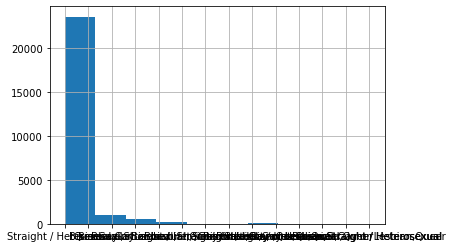

In [1436]:
df['Sexuality'].hist()

In [1437]:
# Esta columna no aporta nada, hay gran mayoria de strights.
df.drop('Sexuality', axis=1, inplace=True)

### SOAccount and SOPartFreq and SOComm and SOVisitFreq and NEWSOSites and SuaveryEase and WelcomeChange

In [1438]:
# Preguntas relacionadas al Sitio de StackOverflow.
df.drop('SOAccount', axis=1, inplace=True) # Si tiene cuenta en SO.
df.drop('SOPartFreq', axis=1, inplace=True) # Frecuencia de participacion en SO.
df.drop('SOComm', axis=1, inplace=True) # Si es parte de una comunidad de SO.
df.drop('SOVisitFreq', axis=1, inplace=True) # Frecuencia de visita a SO.
df.drop('NEWSOSites', axis=1, inplace=True) # Cuantos sitios nuevos visitas de SO.
df.drop('WelcomeChange', axis = 1, inplace=True) # Compared to last year, how welcome do you feel on Stack Overflow?
# Relacionado con la encuesta
df.drop('SurveyEase', axis=1, inplace=True) # Cuan facil te resulto la encuesta.
df.drop('SurveyLength', axis=1, inplace=True) # Cuan larga te resulto la encuesta.

### Trans

<AxesSubplot:>

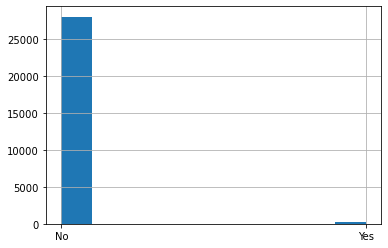

In [1439]:
df['Trans'].hist()

In [1440]:
df.drop('Trans', axis=1, inplace=True)

### UndergradMajor

In [1441]:
df['UndergradMajor'].value_counts()
# Computer science, computer engineering, or software engineering                   19741 Technology
# Another engineering discipline (such as civil, electrical, mechanical, etc.)       2826 Another engineering
# Information systems, information technology, or system administration              2432 Technology
# A natural science (such as biology, chemistry, physics, etc.)                      1275 Natural sience
# Mathematics or statistics                                                          1075 Mathematics
# Web development or web design                                                       936 Technology
# A business discipline (such as accounting, finance, marketing, etc.)                732 Business
# A humanities discipline (such as literature, history, philosophy, etc.)             621 Humanities
# A social science (such as anthropology, psychology, political science, etc.)        509 Social
# Fine arts or performing arts (such as graphic design, music, studio art, etc.)      432 Art
# I never declared a major                                                            190 eq
# A health science (such as nursing, pharmacy, radiology, etc.)                       112 Health


Computer science, computer engineering, or software engineering                   19741
Another engineering discipline (such as civil, electrical, mechanical, etc.)       2826
Information systems, information technology, or system administration              2432
A natural science (such as biology, chemistry, physics, etc.)                      1275
Mathematics or statistics                                                          1075
Web development or web design                                                       936
A business discipline (such as accounting, finance, marketing, etc.)                732
A humanities discipline (such as literature, history, philosophy, etc.)             621
A social science (such as anthropology, psychology, political science, etc.)        509
Fine arts or performing arts (such as graphic design, music, studio art, etc.)      432
I never declared a major                                                            190
A health science (such as nursin

In [1442]:
def undergard_major(row):
    undergard_major = row['UndergradMajor']
    if isinstance(undergard_major, str):
        if "health" in undergard_major:
            return "Health"
        elif "software" in undergard_major or 'information' in undergard_major or 'development' in undergard_major:
            return "Technology"
        elif "Another engineering discipline" in undergard_major:
            return "Another engineering"
        elif "natural science" in undergard_major:
            return "Natural sience"
        elif "arts" in undergard_major:
            return "Art"
        elif "social" in undergard_major:
            return "Social"
        elif "humanities" in undergard_major:
            return "Humanities"
        elif "business" in undergard_major:
            return "Business"
        elif 'Mathematics' in undergard_major:
            return 'Mathematics'
        return "I never declared a major"

df['UndergradMajor'] = df.apply(undergard_major, axis = 1)

In [1443]:
df['UndergradMajor'].value_counts()

Technology                  23109
Another engineering          2826
Natural sience               1275
Mathematics                  1075
Business                      732
Humanities                    621
Social                        509
Art                           432
I never declared a major      190
Health                        112
Name: UndergradMajor, dtype: int64

### WebframeDesireNextYear AND WebframeWorkedWith

In [1444]:
df.drop('WebframeDesireNextYear', axis=1, inplace=True)
df.drop('WebframeWorkedWith', axis=1, inplace=True)

### WorkWeekHrs

In [1445]:
df['WorkWeekHrs'] = df['WorkWeekHrs'].apply(lambda x: None if (x >= 112) or (x < 0) else x)

In [1446]:
df['WorkWeekHrs'].value_counts()

40.000000    14776
45.000000     2885
50.000000     1819
35.000000     1422
38.000000     1034
             ...  
12.500000        1
50.111111        1
69.000000        1
34.500000        1
22.500000        1
Name: WorkWeekHrs, Length: 126, dtype: int64

### YearsCode

In [1447]:
# More than 50 years --> 51
df['YearsCode'] = [0.5 if x == "Less than 1 year" else 51 if x == "More than 50 years" else x for x in df.YearsCodePro]

### YearsCodePro

In [1448]:
# More than 50 years --> 51
df['YearsCodePro'] = [0.5 if x == "Less than 1 year" else 51 if x == "More than 50 years" else x for x in df.YearsCodePro]

In [1450]:
# Null percentage
null_percentage = df.isnull().sum() / df.shape[0] * 100.00
print(null_percentage.to_string())

MainBranch                                        18.362258
Hobbyist                                          18.362258
Age                                               35.100106
Age1stCode                                        18.799220
CompFreq                                          27.266892
ConvertedComp                                     37.697188
Continent                                        100.000000
CurrencyDesc                                      18.606661
CurrencySymbol                                    18.606661
DatabaseDesireNextYear                            39.963463
DatabaseWorkedWith                                32.172217
EdLevel                                           19.794110
Ethnicity                                         34.880391
Gender                                            28.871553
JobSat                                            18.362258
JobSeek                                           23.415706
MiscTechDesireNextYear                  